In [5]:
# Import Needed Liberaries:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
# Import our Data:
data = pd.read_csv("DailyDelhiClimateTrain.csv")
data.head()

date   meantemp   humidity  wind_speed  meanpressure
0  2013-01-01  10.000000  84.500000    0.000000   1015.666667
1  2013-01-02   7.400000  92.000000    2.980000   1017.800000
2  2013-01-03   7.166667  87.000000    4.633333   1018.666667
3  2013-01-04   8.666667  71.333333    1.233333   1017.166667
4  2013-01-05   6.000000  86.833333    3.700000   1016.500000

In [7]:
data.describe()

meantemp     humidity   wind_speed  meanpressure
count  1462.000000  1462.000000  1462.000000   1462.000000
mean     25.495521    60.771702     6.802209   1011.104548
std       7.348103    16.769652     4.561602    180.231668
min       6.000000    13.428571     0.000000     -3.041667
25%      18.857143    50.375000     3.475000   1001.580357
50%      27.714286    62.625000     6.221667   1008.563492
75%      31.305804    72.218750     9.238235   1014.944901
max      38.714286   100.000000    42.220000   7679.333333

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


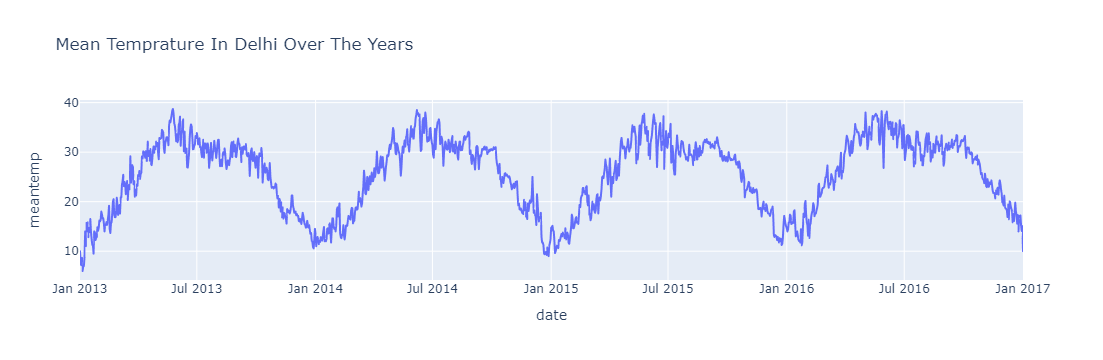

In [10]:
# lets take a look at the temprature over the years in Delhi:
figure = px.line(data, x ='date', y = 'meantemp', title = 'Mean Temprature In Delhi Over The Years' )
figure.show()

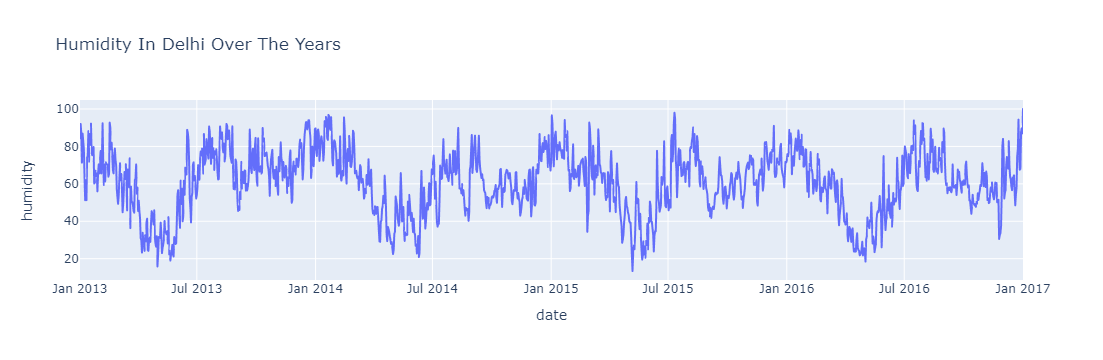

In [11]:
# lets take a look at the humidity over the years in Delhi:
figure = px.line(data, x ='date', y = 'humidity', title = 'Humidity In Delhi Over The Years' )
figure.show()

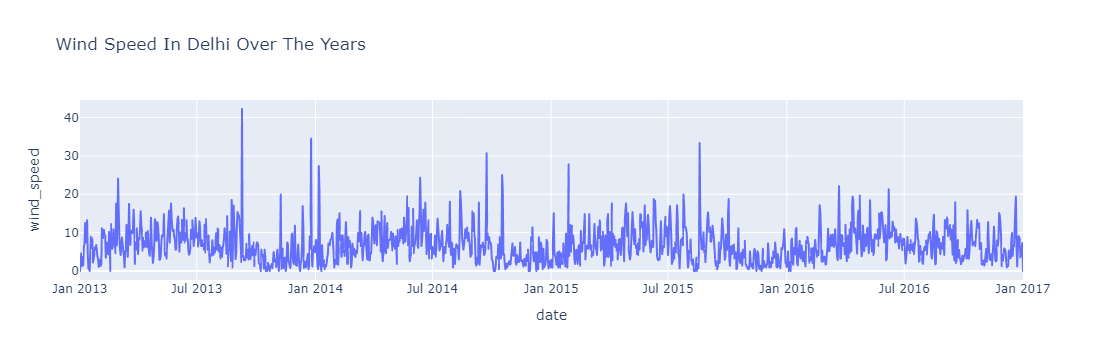

In [12]:
# lets take a look at the wind speed over the years in Delhi:
figure = px.line(data, x ='date', y = 'wind_speed', title = 'Wind Speed In Delhi Over The Years' )
figure.show()

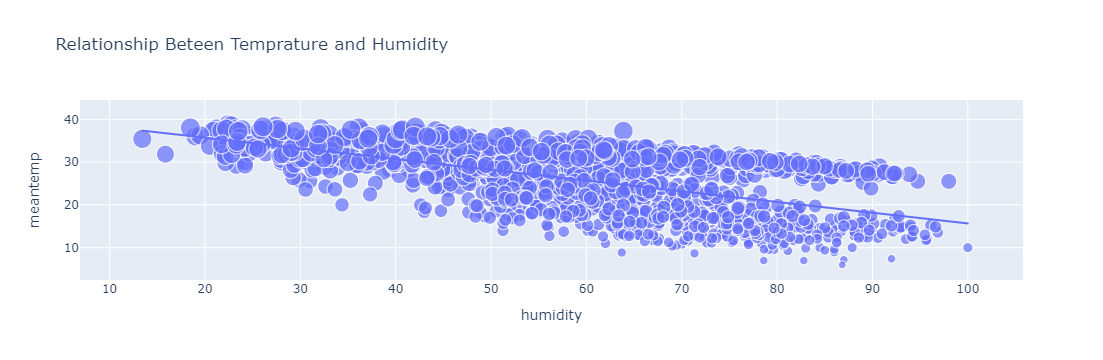

In [13]:
# lets see the relationship betwwen the Mean Temprature and the Humidity over the years in Delhi:
figure = px.scatter(data_frame = data, x= "humidity", y="meantemp", size="meantemp", trendline ="ols",
                    title = "Relationship Beteen Temprature and Humidity" )
figure.show()

In [14]:
# As we see there is an Inverse Relationship between the temprature and the humidity in Delhi
# Now lets see the change in the temprature in delhi over the years based on months:
# first we need to create two new columns of the year and the month:

data['date'] = pd.to_datetime(data['date'], format = '%Y-%m-%d' )
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data.head()

date   meantemp   humidity  wind_speed  meanpressure  year  month
0 2013-01-01  10.000000  84.500000    0.000000   1015.666667  2013      1
1 2013-01-02   7.400000  92.000000    2.980000   1017.800000  2013      1
2 2013-01-03   7.166667  87.000000    4.633333   1018.666667  2013      1
3 2013-01-04   8.666667  71.333333    1.233333   1017.166667  2013      1
4 2013-01-05   6.000000  86.833333    3.700000   1016.500000  2013      1

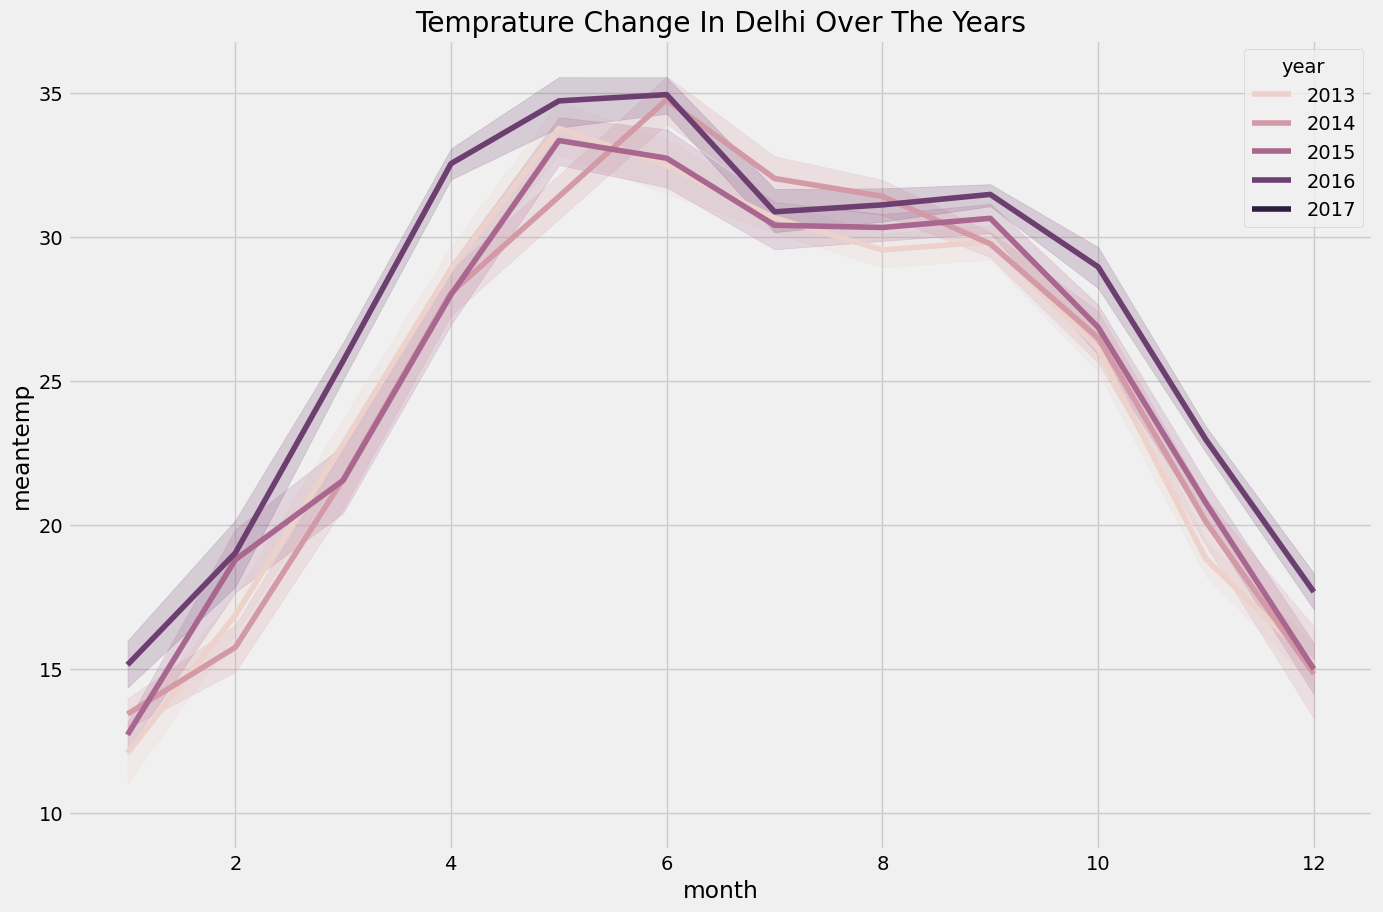

In [17]:
# Now lets take a look on the change in the temprature on Delhi over the years:

plt.style.use('fivethirtyeight')
plt.figure(figsize =(15,10))
plt.title('Temprature Change In Delhi Over The Years')
sns.lineplot(data= data, x = 'month', y = 'meantemp', hue='year')
plt.show()

In [18]:
# Now we need to predict the coming temprature in Delhi, So we will use the prediction Model Facebook Prophet:
!pip install prophet

   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.1/13.3 MB 1.6 MB/s eta 0:00:09
   ---------------------------------------- 0.1/13.3 MB 1.0 MB/s eta 0:00:13
   ---------------------------------------- 0.1/13.3 MB 1.0 MB/s eta 0:00:13
   ---------------------------------------- 0.1/13.3 MB 1.0 MB/s eta 0:00:13
   ---------------------------------------- 0.1/13.3 MB 1.0 MB/s eta 0:00:13
    --------------------------------------- 0.2/13.3 MB 724.0 kB/s eta 0:00:19
    --------------------------------------- 0.3/13.3 MB 714.4 kB/s eta 0:00:19
   - -------------------------------------- 0.3/13.3 MB 838.1 kB/s eta 0:00:16
   - -------------------------------------- 0.5/13.3 MB 982.5 kB/s eta 0:00:14
   - -------------------------------------- 0.5/13.3 MB 992.3 kB/s eta 0:00:13
   - -------------------------------------- 0.5/13.3 MB 902.0 kB/s eta 0:00:15
   - -------------------------------------- 0.5/13.3 MB 902.0 kB/s eta 

In [19]:
# As prophet model use time data as ds and variable data as Y, we need to rename our columns:
forecast_data = data.rename(columns = {'date':'ds' , 'meantemp':'y' })
forecast_data.head()

ds          y   humidity  wind_speed  meanpressure  year  month
0 2013-01-01  10.000000  84.500000    0.000000   1015.666667  2013      1
1 2013-01-02   7.400000  92.000000    2.980000   1017.800000  2013      1
2 2013-01-03   7.166667  87.000000    4.633333   1018.666667  2013      1
3 2013-01-04   8.666667  71.333333    1.233333   1017.166667  2013      1
4 2013-01-05   6.000000  86.833333    3.700000   1016.500000  2013      1

18:33:33 - cmdstanpy - INFO - Chain [1] start processing
18:33:42 - cmdstanpy - INFO - Chain [1] done processing


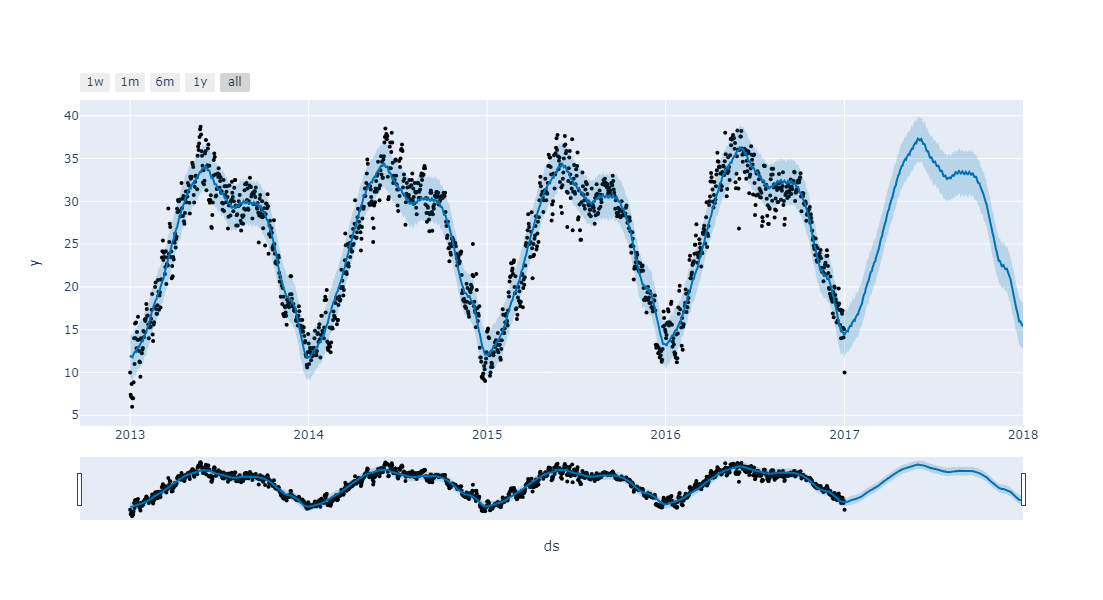

In [20]:
# Now lets build our model , fit the data in it and predict the teprature:

from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

model = Prophet()
model.fit(forecast_data)
forecasts = model.make_future_dataframe(periods = 365)
predictions = model.predict(forecasts)
plot_plotly(model, predictions)